# Wordle Solver: Testing Pipeline
**Summary:** This is a testing pipeline for algorithms that solve the New York Time's [Wordle](https://www.nytimes.com/games/wordle/index.html) puzzle. This pipeline tests the algorithms on the entire dataset of 5-leter works, and visualises the results.

## Running algorithms on test data
The cell below enables the user to run each algorithm on different sized datasets, and saves the results in a CSV file so that it can be visualised below.

In [2]:
#Before running, ensure the kernel is set to the virtual environment

#Import top level function
from helper_functions.process_user_inputs import run_wordle_solver
from helper_functions.other_helper_functions.other_helper_functions import save_test_data

#User inputs
mode="one_word"
method="random"

#Run wordle solver
solution=run_wordle_solver(mode,method)

#Options for "mode": "one_word", "100_words", "all_words"
#Options for "method": "random","rank","brute_force_simple","brute_force_extended","chatbot_easy","chatbot_hard"

#Save test data
save_on_off="off" #Options: "on" or "off"

if save_on_off=="on" and (mode=="100_words" or mode=="all_words"):
    save_message=save_test_data(solution.n_guesses_all_words,mode,next_word_selection)
    print(save_message)

#Note:
# -- "one_word" runs the wordle solver for just one specific word
# -- "100_words" runs the wordle solver for 100 words. this is for initial testing, and is...
#    ...much quicker to run than "all_words"
# -- "all_words" runs the wordle solver across all available 5-letter...
#    ...words. This is used to assess overall performance. 

#If using "one_word" mode, then the attributes of the solution object are:
# - solution.actual_word = the actual word that we are trying to solve, which is currently randomly selected
# - solution.final_guess = the word that we thing is the actual word, based on the output of our algorithms
# - solution.n_guesses = the total number of guesses that it has taken to get to the final guess
# - solution.t_solve = the total number of time that it has taken to get to the final guess

#If using "all_words" or "100_words" mode, then the attributes of the solution object are:
# - solution.n_guesses_all_words = a list of the number of guesses that it took to solve each word
# - solution.t_solve_all_words = the total time that it took to solve all words in the dataset
# - solution.basic_stats = basic descriptive statistics on the number of guesses for all words, including average and range

viola
glare
plane
flame
The final guess is:  flame
The actual word is:  flame
Number of guesses:  4
Error returned:  0
Time taken to solve:  0.03965 s
Estimated time to run on 100 words:  4.0 s, or  0.07  minutes
Estimated time to run on all words:  92.0 s, or  1.53  minutes, or 0.03  hours


## Visualising model performance
The cell below visualises and measures the various algorithms'/models' performances across the entire Wordle dataset.

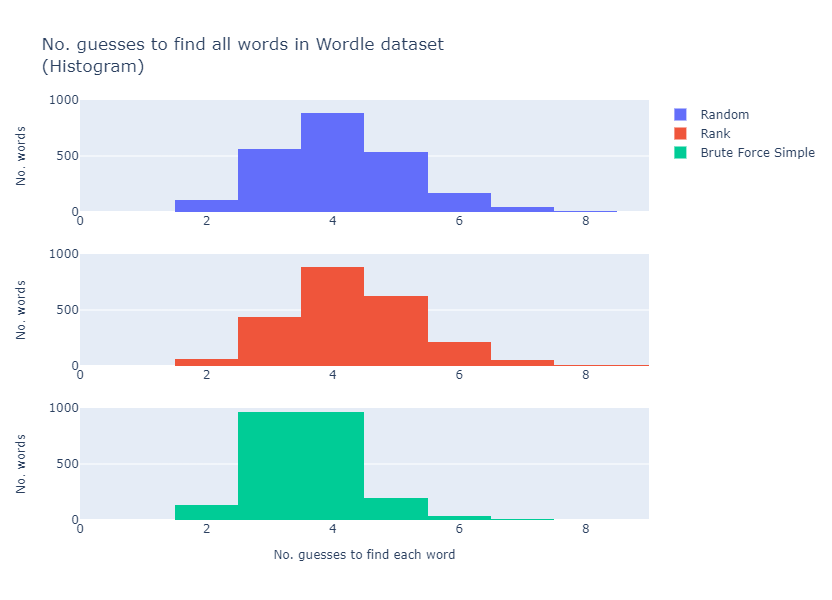

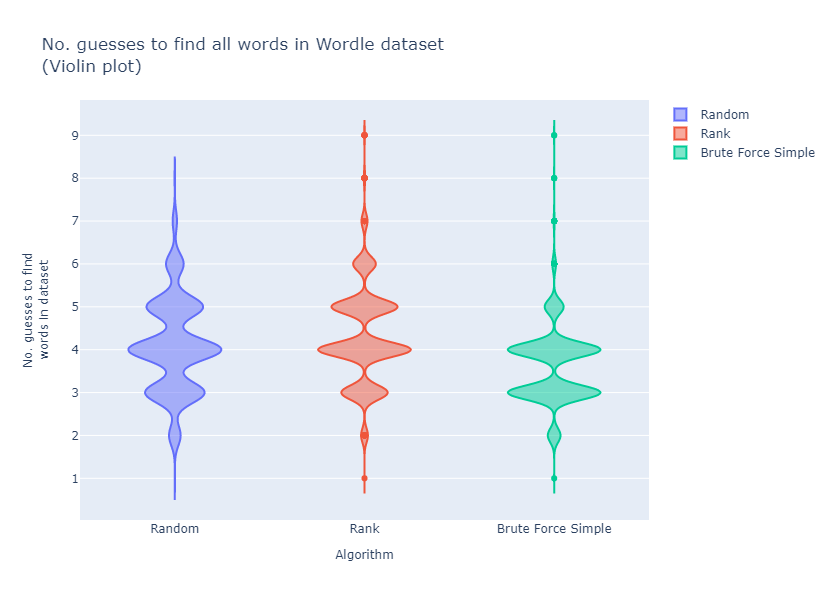

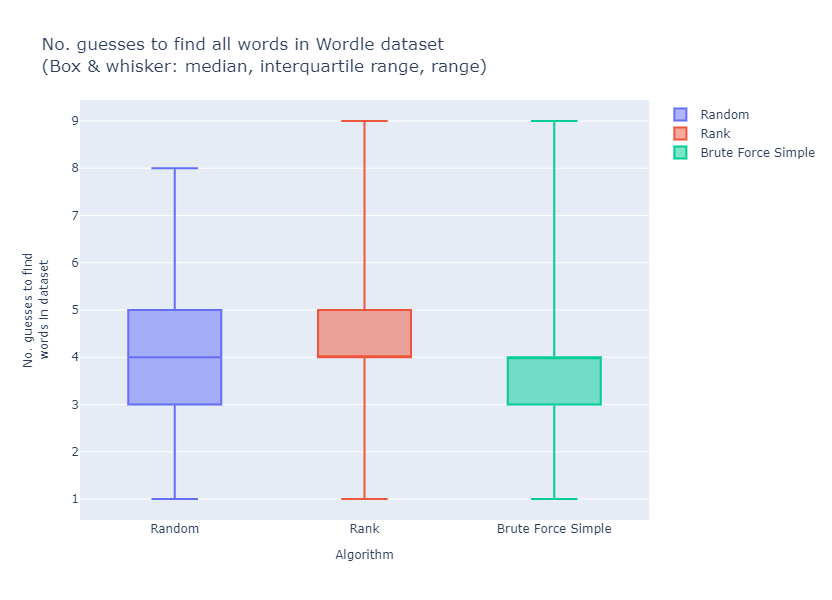

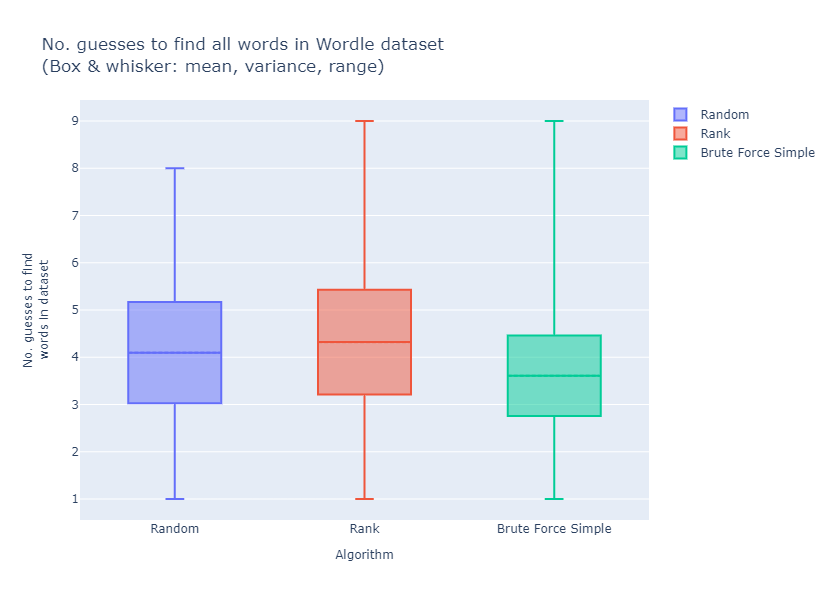

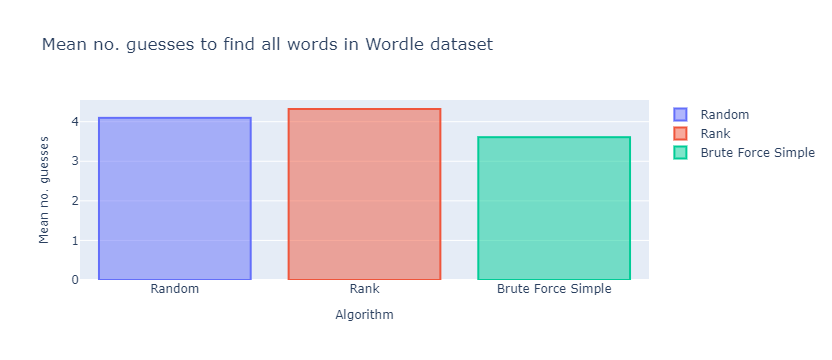

Descriptive stats:


,Random,Rank,Brute Force Simple
count,2310,2310,2310
mean,4.097,4.32,3.608
std,1.072,1.108,0.8536
min,1,1,1
25%,3,4,3
50%,4,4,4
75%,5,5,4
max,8,9,9


Pairwise statistical significance testing (t-tests)


,Random,Rank,Brute Force Simple
Random,0,3.5e-12,9e-64
Rank,3.5e-12,0,2.2e-124
Brute Force Simple,9e-64,2.2e-124,0


In [8]:
#*******************#
#*** User inputs ***#
#*******************#
save_figures="on"  #Options: "on", "off"
                    #Choose to save figures to online plotly account for hosting on github

#**********************#
#*** Import modules ***#
#**********************#

import pandas as pd
import plotly as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
from scipy.stats import ttest_ind
import numpy as np
import chart_studio.plotly as py

#**********************#
#*** Pre-processing ***#
#**********************#

# Name of the CSV file
filename1 = "test_data/random_all_words_test_data.csv"
filename2 = "test_data/rank_all_words_test_data.csv"
filename3 = "test_data/brute_force_simple_all_words_test_data.csv"

# Reading the CSV file
df1 = pd.read_csv(filename1)
df2 = pd.read_csv(filename2)
df3 = pd.read_csv(filename3)

# Printing the DataFrame
all_data=pd.concat([df1, df2, df3], axis=1)
all_data.columns=['Random','Rank','Brute Force Simple']

#Define colours for graphs
fill_colours=['rgba(99, 110, 250, 0.5)','rgba(239, 85, 59, 0.5)','rgba(0, 204, 150, 0.5)']
line_colours=['rgb(99, 110, 250)','rgb(239, 85, 59)','rgb(0, 204, 150)']
column_names=["Random","Rank","Brute Force Simple"]

#*****************#
#*** Histogram ***#
#*****************#

# create the subplot with 3 x-axes
fig = make_subplots(rows=3, cols=1, shared_yaxes=True)

# add histogram trace for first column
fig.add_trace(go.Histogram(x=all_data['Random'], name='Random'), row=1, col=1)

# add histogram trace for second column
fig.add_trace(go.Histogram(x=all_data['Rank'], name='Rank'), row=2, col=1)

# add histogram trace for third column
fig.add_trace(go.Histogram(x=all_data['Brute Force Simple'], name='Brute Force Simple'), row=3, col=1)

#set x axes
max_value = all_data.max().max() #Get highest overall value
fig.update_xaxes(range=[0, max_value])

#set y axis
freq_count_random = all_data['Random'].value_counts() # get the frequency count of each value in the column
freq_count_rank = all_data['Rank'].value_counts() # get the frequency count of each value in the column
freq_count_brute_force_simple = all_data['Brute Force Simple'].value_counts() # get the frequency count of each value in the column
max_count_random = freq_count_random.max() # get the maximum count
max_count_rank = freq_count_rank.max() # get the maximum count
max_count_brute_force_simple = freq_count_brute_force_simple.max() # get the maximum count
max_count=max([max_count_random,max_count_rank,max_count_brute_force_simple])
max_count_rounded = math.ceil(max_count/200) * 200
fig.update_yaxes(range=[0, max_count_rounded]) # set the y-axis range to the maximum value

# Set the xaxis title for the bottom subplot
fig.layout.xaxis3.title.text = "No. guesses to find each word"
fig.layout.xaxis3.title.font.size = 12

# Set the yaxis title for all three subplots
for ax in fig.layout.yaxis1, fig.layout.yaxis2, fig.layout.yaxis3:
    ax.title.text = "No. words"
    ax.title.font.size = 12

#Overall title
fig.update_layout(title_text="No. guesses to find all words in Wordle dataset<br>(Histogram)")

# show the plot
fig.update_layout(height=600)
fig.show()

#Save figure
if save_figures == "on":
    url = py.plot(fig, filename='wordle_histogram')

#*******************#
#*** Violin Plot ***#
#*******************#

#Create plot
data = [go.Violin(y=all_data[col], name=col) for col in all_data.columns]
layout = go.Layout(title='No. guesses to find all words in Wordle dataset<br>(Violin plot)')
fig = go.Figure(data=data, layout=layout)

# Set the xaxis title for the bottom subplot
fig.layout.xaxis.title.text = "Algorithm"
fig.layout.xaxis.title.font.size = 12

# Set the yaxis title for the bottom subplot
fig.layout.yaxis.title.text = "No. guesses to find<br>words in dataset"
fig.layout.yaxis.title.font.size = 12

#Display figure
fig.update_layout(height=600)
fig.show()

#Save figure
if save_figures == "on":
    url = py.plot(fig, filename='wordle_violin')

#********************************#
#*** Box & Whisker (standard) ***#
#********************************#

#Create plot
data = [go.Box(y=all_data[col], boxpoints=False, name=col) for col in all_data.columns]
layout = go.Layout(title='No. guesses to find all words in Wordle dataset<br>(Box & whisker: median, interquartile range, range)')
fig = go.Figure(data=data, layout=layout)

#Set the xaxis title for the bottom subplot
fig.layout.xaxis.title.text = "Algorithm"
fig.layout.xaxis.title.font.size = 12

#Set the yaxis title for the bottom subplot
fig.layout.yaxis.title.text = "No. guesses to find<br>words in dataset"
fig.layout.yaxis.title.font.size = 12

#Display figure
fig.update_layout(height=600)
fig.show()

#Save figure
if save_figures == "on":
    url = py.plot(fig, filename='wordle_box_whisker_standard')

#****************************#
#*** Box & Whisker (mean) ***#
#****************************#

# Calculate the mean, std deviation, max and min of each column
means = all_data.mean()
std_dev = all_data.std()
max_values = all_data.max()
min_values = all_data.min()

#Initialise data for graph
data = []

# Create a box trace for each column
for ind in range(len(means)):
    trace = go.Box(q1 = [means[ind] - std_dev[ind]],
                   q3 = [means[ind] + std_dev[ind]],
                   median = [means[ind]],
                   upperfence=[max_values[ind]],
                   lowerfence=[min_values[ind]],
                   name=column_names[ind],
                   #boxpoints='all',
                   #jitter=0.3,
                   #pointpos=-1.8,
                   x0=ind,
                   boxmean=True,
                   whiskerwidth=0.2,
                   fillcolor=fill_colours[ind],
                   line=dict(color=line_colours[ind])
                  )
    data.append(trace)

#Generate plot
layout = go.Layout(title='No. guesses to find all words in Wordle dataset<br>(Box & whisker: mean, variance, range)', 
                   xaxis={'tickmode': 'array', 'tickvals': [0, 1, 2], 'ticktext': ['Random', 'Rank', 'Brute Force Simple']})
fig = go.Figure(data=data, layout=layout)

# Set the xaxis title for the bottom subplot
fig.layout.xaxis.title.text = "Algorithm"
fig.layout.xaxis.title.font.size = 12

# Set the yaxis title for the bottom subplot
fig.layout.yaxis.title.text = "No. guesses to find<br>words in dataset"
fig.layout.yaxis.title.font.size = 12

#Display figure
fig.update_layout(height=600)
fig.show()

#Save figure
if save_figures == "on":
    url = py.plot(fig, filename='wordle_box_whisker_mean')

#**************************#
#*** Means as bar plots ***#
#**************************#

# Calculate the mean of each column
means = all_data.mean()

#Initialise data variable
data=[]

# Create a bar trace for the means
for ind in range(len(means)):
    trace = go.Bar(x=[means.index[ind]], y=[means.values[ind]],
                   name=column_names[ind],
                   marker_color=fill_colours[ind],
                   marker_line_color=line_colours[ind],
                   marker_line_width=2)
    data.append(trace)

    
#Generate plot
layout = go.Layout(title='Mean no. guesses to find all words in Wordle dataset')
fig = go.Figure(data=data, layout=layout)

# Set the xaxis title for the bottom subplot
fig.layout.xaxis.title.text = "Algorithm"
fig.layout.xaxis.title.font.size = 12

# Set the yaxis title for the bottom subplot
fig.layout.yaxis.title.text = "Mean no. guesses"
fig.layout.yaxis.title.font.size = 12

#Display figure
fig.show()

#Save figure
if save_figures == "on":
    url = py.plot(fig, filename='wordle_bar')

#*************************#
#*** Descriptive stats ***#
#*************************#

# Create an empty dataframe to store the descriptive statistics
all_data_stats = pd.DataFrame()

# Get descriptive statistics for each column and store them in df_stats
all_data_stats['Random'] = all_data['Random'].describe()
all_data_stats['Rank'] = all_data['Rank'].describe()
all_data_stats['Brute Force Simple'] = all_data['Brute Force Simple'].describe()

#Reformat to remove trailing zeros
all_data_stats = all_data_stats.applymap('{:.4g}'.format)

#Display stats
print("Descriptive stats:")
display(all_data_stats)

#****************************************#
#*** Statistical significance testing ***#
#****************************************#

# Pairwise t-test between col1 and col2
t_stat_random_rank, p_value_random_rank = ttest_ind(all_data['Random'], all_data['Rank'])
#print(f"Pairwise t-test between Random and Rank: t-statistic = {t_stat_random_rank}, p-value = {p_value_random_rank}")

# Pairwise t-test between col1 and col3
t_stat_random_bfs, p_value_random_bfs = ttest_ind(all_data['Random'], all_data['Brute Force Simple'])
#print(f"Pairwise t-test between Random and Brute Force Simple: t-statistic = {t_stat_random_bfs}, p-value = {p_value_random_bfs}")

# Pairwise t-test between col2 and col3
t_stat_rank_bfs, p_value_rank_bfs = ttest_ind(all_data['Rank'], all_data['Brute Force Simple'])
#print(f"Pairwise t-test between Rank and Brute Force Simple: t-statistic = {t_stat_rank_bfs}, p-value = {p_value_rank_bfs}")

#Generate numpy array
pairwise_ttest_pvalues=np.array([[0,p_value_random_rank,p_value_random_bfs],
                                [p_value_random_rank,0,p_value_rank_bfs],
                                [p_value_random_bfs,p_value_rank_bfs,0]])

#Generated rounded numpy array
def round_number_to_2sf(number):
    rounded_number = round(number, -int(math.floor(math.log10(abs(number)))) + 1)
    return(rounded_number)

n_rows=np.shape(pairwise_ttest_pvalues)[0]
n_columns=np.shape(pairwise_ttest_pvalues)[1]
pairwise_ttest_pvalues_rounded=np.empty([n_rows,n_columns])

for j in range(n_columns):
    for i in range(n_rows):
        number=pairwise_ttest_pvalues[i,j]
        if number == 0:
            pairwise_ttest_pvalues_rounded[i,j]=0
        else:
            rounded_number=round_number_to_2sf(number)
            formatted_number = '{:.3g}'.format(rounded_number)
            pairwise_ttest_pvalues_rounded[i,j]=formatted_number

#Generate dataframe
table_ttests_pvalues=pd.DataFrame(pairwise_ttest_pvalues,
                                  columns=["Random", "Rank", "Brute Force Simple"],
                                  index=["Random", "Rank", "Brute Force Simple"])

#Generate rounded dataframe
table_ttests_pvalues_rounded=pd.DataFrame(pairwise_ttest_pvalues_rounded,
                                          columns=["Random", "Rank", "Brute Force Simple"],
                                          index=["Random", "Rank", "Brute Force Simple"])

table_ttests_pvalues_rounded = table_ttests_pvalues_rounded.applymap(lambda x: '{:g}'.format(x))

#Display dataframe
print("Pairwise statistical significance testing (t-tests)")
display(table_ttests_pvalues_rounded)

In [3]:
import plotly.plotly as py
py.sign_in('rflint', '4lvJevbYcLr7OWORabzT')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [4]:
import chart_studio

In [6]:
import chart_studio.plotly as py

In [7]:
url = py.plot(fig, filename='test')